In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Find available dataset names in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df = sns.load_dataset('flights')
print(df.head())
# we get only year nd month for the date, we need day also

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


In [4]:
# convert the date to a YYYY-MM-DD format in a new column named yearMonth
df['yearMonth'] = "01-" +df['month'].astype(str)+"-"+df['year'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None


In [5]:
# yearMonth is of type object - we may have problems later , o convert it into datetime
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None
   year month  passengers  yearMonth
0  1949   Jan         112 1949-01-01
1  1949   Feb         118 1949-02-01
2  1949   Mar         132 1949-03-01
3  1949   Apr         129 1949-04-01
4  1949   May         121 1949-05-01


In [6]:
# Make yearMonth column as the dataframe index
df.set_index('yearMonth',inplace=True) # inplac will make permanent changes to the DF
print(df.head())

            year month  passengers
yearMonth                         
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121


In [8]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var])
    stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of observations used'])
    print(stats)
    for key, values in adfTest[4].items():
        print('criticality', key,":",values)
    sns.lineplot(data= dataFrame,x= dataFrame.index, y= var)
    sns.lineplot(data= dataFrame,x= dataFrame.index, y= 'rollMean')
    sns.lineplot(data= dataFrame,x= dataFrame.index, y= 'rollStd')    
    plt.show()

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
1949-06-01         135  121.0       14.0
1949-07-01         148  135.0       13.0
1949-08-01         148  148.0        0.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  136.0      -17.0
1949-11-01         104  119.0      -15.0
1949-12-01         118  104.0       14.0
1950-01-01         115  118.0       -3.0
1950-02-01         126  115.0       11.0
1950-03-01         141  126.0       15.0
1950-04-01         135  141.0       -6.0
1950-05-01         125  135.0      -10.0
1950-06-01         149  125.0       24.0
1950-07-01         170  149.0       21.0
1950-08-01         170  170.0        0.0


<ipython-input-8-c4d3f0b3b9ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
<ipython-input-8-c4d3f0b3b9ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


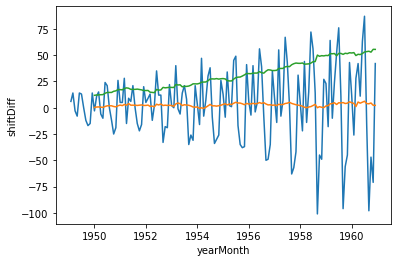

In [9]:
air_df = df[['passengers']].copy()

# By default , shift is by 1 time period (here, one month)
# Create a new column which will contain the shifted value from passengers column - See slides (DA-20)

air_df['shift'] = air_df.passengers.shift(1)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
print(air_df.head(20))
test_stationarity(air_df.dropna(), 'shiftDiff')
# p-value is just close to 0.05, so let us try a shift by 2

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118    NaN        NaN
1949-03-01         132  112.0       20.0
1949-04-01         129  118.0       11.0
1949-05-01         121  132.0      -11.0
1949-06-01         135  129.0        6.0
1949-07-01         148  121.0       27.0
1949-08-01         148  135.0       13.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  148.0      -29.0
1949-11-01         104  136.0      -32.0
1949-12-01         118  119.0       -1.0
1950-01-01         115  104.0       11.0
1950-02-01         126  118.0        8.0
1950-03-01         141  115.0       26.0
1950-04-01         135  126.0        9.0
1950-05-01         125  141.0      -16.0
1950-06-01         149  135.0       14.0
1950-07-01         170  125.0       45.0
1950-08-01         170  149.0       21.0
Test Statistic                  -2.961695
p-value                          0.038630
#lags used    

<ipython-input-8-c4d3f0b3b9ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
<ipython-input-8-c4d3f0b3b9ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


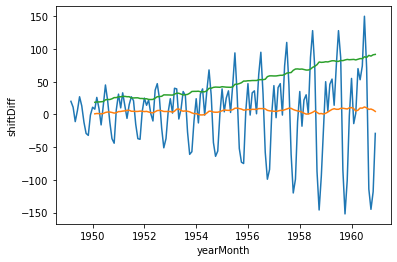

In [ ]:
air_df['shift'] = air_df.passengers.shift(2)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
print(air_df.head(20))
test_stationarity(air_df.dropna(), 'shiftDiff')

# here we reject the null hypothesis
# when p-value is below 0.05 we reject the null hypothesis from the data

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118    NaN        NaN
1949-03-01         132    NaN        NaN
1949-04-01         129  112.0       17.0
1949-05-01         121  118.0        3.0
1949-06-01         135  132.0        3.0
1949-07-01         148  129.0       19.0
1949-08-01         148  121.0       27.0
1949-09-01         136  135.0        1.0
1949-10-01         119  148.0      -29.0
1949-11-01         104  148.0      -44.0
1949-12-01         118  136.0      -18.0
1950-01-01         115  119.0       -4.0
1950-02-01         126  104.0       22.0
1950-03-01         141  118.0       23.0
1950-04-01         135  115.0       20.0
1950-05-01         125  126.0       -1.0
1950-06-01         149  141.0        8.0
1950-07-01         170  135.0       35.0
1950-08-01         170  125.0       45.0
Test Statistic                  -2.886506
p-value                          0.046940
#lags used    

<ipython-input-8-c4d3f0b3b9ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
<ipython-input-8-c4d3f0b3b9ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


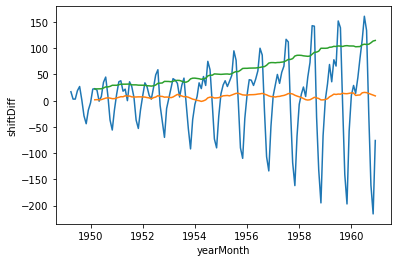

In [ ]:
# the above wil be considered here 3 is just for a normal checking

air_df['shift'] = air_df.passengers.shift(3)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
print(air_df.head(20))
test_stationarity(air_df.dropna(), 'shiftDiff')